# About dataset

This dataset is about the direct phone call marketing campaigns, which aim to promote term deposits among existing customers, by a Portuguese banking institution from May 2008 to November 2010.This is a Classification problem with 41188 rows & 21 columns

**Problem**: The goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

### Attributes:
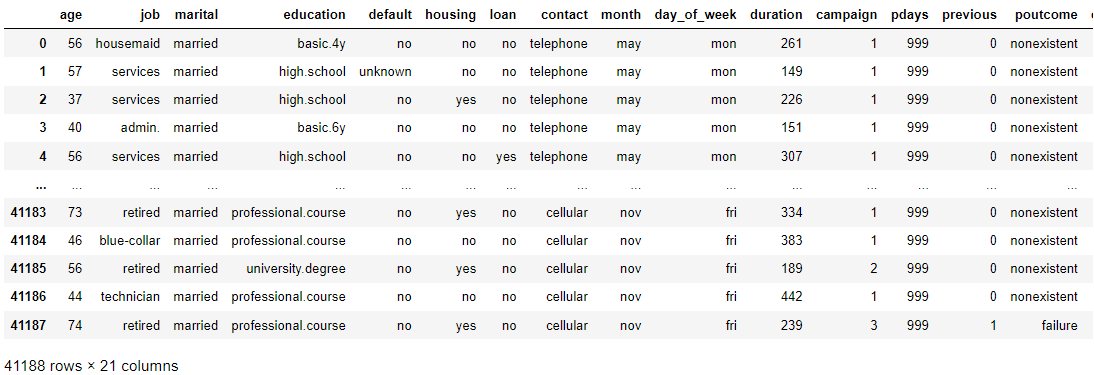

### Import Modules

In [68]:
import numpy as np #perform numeric or maths , written in C lng.
import pandas as pd

In [69]:
import warnings
warnings.filterwarnings("ignore")

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  
import plotly.express as px
import pickle

### Loading the Dataset

In [71]:
#csv file reading by panda 
dt=pd.read_csv('bank.csv')

In [72]:
pd.set_option('display.max_columns', None)
dt

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,Unnamed: 21
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0,NaN
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0,NaN
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0,NaN
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0,NaN
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,1,NaN
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,0,NaN
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,0,NaN
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,1,NaN


In [73]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [74]:
# statistical info
dt.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,Unnamed: 21
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,0.0
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.019010,0.112654,NaN
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.178074,0.316173,NaN
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4964.000000,0.000000,NaN
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.000000,0.000000,NaN
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000,NaN
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.000000,0.000000,NaN
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.000000,1.000000,NaN


In [75]:
#drop columns 
df=dt.drop(['marital','contact','month','day_of_week','campaign','euribor3m'], axis=1)
df

,age,job,education,default,housing,loan,duration,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,nr.employed,y,Unnamed: 21
0,56,housemaid,basic.4y,no,no,no,261,999,0,nonexistent,1.1,93.994,-36.4,5191,0,NaN
1,57,services,high.school,unknown,no,no,149,999,0,nonexistent,1.1,93.994,-36.4,5191,0,NaN
2,37,services,high.school,no,yes,no,226,999,0,nonexistent,1.1,93.994,-36.4,5191,0,NaN
3,40,admin.,basic.6y,no,no,no,151,999,0,nonexistent,1.1,93.994,-36.4,5191,0,NaN
4,56,services,high.school,no,no,yes,307,999,0,nonexistent,1.1,93.994,-36.4,5191,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,professional.course,no,yes,no,334,999,0,nonexistent,-1.1,94.767,-50.8,4964,1,NaN
41184,46,blue-collar,professional.course,no,no,no,383,999,0,nonexistent,-1.1,94.767,-50.8,4964,0,NaN
41185,56,retired,university.degree,no,yes,no,189,999,0,nonexistent,-1.1,94.767,-50.8,4964,0,NaN
41186,44,technician,professional.course,no,no,no,442,999,0,nonexistent,-1.1,94.767,-50.8,4964,1,NaN


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   education       41188 non-null  object 
 3   default         41188 non-null  object 
 4   housing         41188 non-null  object 
 5   loan            41188 non-null  object 
 6   duration        41188 non-null  int64  
 7   pdays           41188 non-null  int64  
 8   previous        41188 non-null  int64  
 9   poutcome        41188 non-null  object 
 10  emp.var.rate    41188 non-null  float64
 11  cons.price.idx  41188 non-null  float64
 12  cons.conf.idx   41188 non-null  float64
 13  nr.employed     41188 non-null  int64  
 14  y               41188 non-null  int64  
 15  Unnamed: 21     0 non-null      float64
dtypes: float64(4), int64(6), object(6)
memory usage: 5.0+ MB


In [77]:
df.head(10)   #select first 10 records

,age,job,education,default,housing,loan,duration,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,nr.employed,y,Unnamed: 21
0,56,housemaid,basic.4y,no,no,no,261,999,0,nonexistent,1.1,93.994,-36.4,5191,0,NaN
1,57,services,high.school,unknown,no,no,149,999,0,nonexistent,1.1,93.994,-36.4,5191,0,NaN
2,37,services,high.school,no,yes,no,226,999,0,nonexistent,1.1,93.994,-36.4,5191,0,NaN
3,40,admin.,basic.6y,no,no,no,151,999,0,nonexistent,1.1,93.994,-36.4,5191,0,NaN
4,56,services,high.school,no,no,yes,307,999,0,nonexistent,1.1,93.994,-36.4,5191,0,NaN
5,45,services,basic.9y,unknown,no,no,198,999,0,nonexistent,1.1,93.994,-36.4,5191,0,NaN
6,59,admin.,professional.course,no,no,no,139,999,0,nonexistent,1.1,93.994,-36.4,5191,0,NaN
7,41,blue-collar,unknown,unknown,no,no,217,999,0,nonexistent,1.1,93.994,-36.4,5191,0,NaN
8,24,technician,professional.course,no,yes,no,380,999,0,nonexistent,1.1,93.994,-36.4,5191,0,NaN
9,25,services,high.school,no,yes,no,50,999,0,nonexistent,1.1,93.994,-36.4,5191,0,NaN


## Exploratory Data Analysis (EDA)

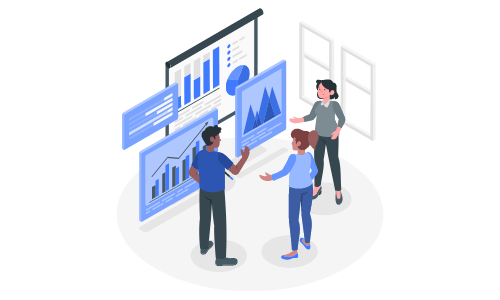

In [78]:
# returns description of the data in the DataFram
df.describe()           #when we describe data with code is called Eda

,age,duration,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,nr.employed,y,Unnamed: 21
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,0.0
mean,40.02406,258.285010,962.475454,0.172963,0.081886,93.575664,-40.502600,5167.019010,0.112654,NaN
std,10.42125,259.279249,186.910907,0.494901,1.570960,0.578840,4.628198,72.178074,0.316173,NaN
min,17.00000,0.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,4964.000000,0.000000,NaN
25%,32.00000,102.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,5099.000000,0.000000,NaN
50%,38.00000,180.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,5191.000000,0.000000,NaN
75%,47.00000,319.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,5228.000000,0.000000,NaN
max,98.00000,4918.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5228.000000,1.000000,NaN


In [79]:
#convert columns into a list
list(df.columns)

['age',
 'job',
 'education',
 'default',
 'housing',
 'loan',
 'duration',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'nr.employed',
 'y',
 'Unnamed: 21']

In [80]:
#missing values in dataset
df.isnull().sum()

age                   0
job                   0
education             0
default               0
housing               0
loan                  0
duration              0
pdays                 0
previous              0
poutcome              0
emp.var.rate          0
cons.price.idx        0
cons.conf.idx         0
nr.employed           0
y                     0
Unnamed: 21       41188
dtype: int64

In [81]:
#get total missing values
df.isnull().sum().sum()

41188

In [82]:
df.isnull()

,age,job,education,default,housing,loan,duration,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,nr.employed,y,Unnamed: 21
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
41184,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
41185,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
41186,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [83]:
#total rows and total columns
df.shape

(41188, 16)

In [84]:
#Access a group of rows & columns by label(s) or a boolean array
df.loc[0]

age                        56
job                 housemaid
education            basic.4y
default                    no
housing                    no
loan                       no
duration                  261
pdays                     999
previous                    0
poutcome          nonexistent
emp.var.rate              1.1
cons.price.idx         93.994
cons.conf.idx           -36.4
nr.employed              5191
y                           0
Unnamed: 21               NaN
Name: 0, dtype: object

In [85]:
#select a specific row or column from the data set
df.iloc[-1]

age                                74
job                           retired
education         professional.course
default                            no
housing                           yes
loan                               no
duration                          239
pdays                             999
previous                            1
poutcome                      failure
emp.var.rate                     -1.1
cons.price.idx                 94.767
cons.conf.idx                   -50.8
nr.employed                      4964
y                                   0
Unnamed: 21                       NaN
Name: 41187, dtype: object

In [86]:
df_skew = df.loc[:, 'age':'nr.employed']
df_skew = df_skew.select_dtypes(include=['int64', 'float64'])  # Select numeric columns

# Calculate and print skewness for each numeric column
for col in df_skew.columns:
    print("\nSkewness of " + col + " is", df_skew[col].skew())


Skewness of age is 0.7846968157646645

Skewness of duration is 3.2631412552628314

Skewness of pdays is -4.922189916418165

Skewness of previous is 3.832042242861185

Skewness of emp.var.rate is -0.7240955492472558

Skewness of cons.price.idx is -0.23088765135780656

Skewness of cons.conf.idx is 0.30317985874819237

Skewness of nr.employed is -1.0416293118770363


In [87]:
#check skewness
df.skew

<bound method DataFrame.skew of        age          job            education  default housing loan  duration  \
0       56    housemaid             basic.4y       no      no   no       261   
1       57     services          high.school  unknown      no   no       149   
2       37     services          high.school       no     yes   no       226   
3       40       admin.             basic.6y       no      no   no       151   
4       56     services          high.school       no      no  yes       307   
...    ...          ...                  ...      ...     ...  ...       ...   
41183   73      retired  professional.course       no     yes   no       334   
41184   46  blue-collar  professional.course       no      no   no       383   
41185   56      retired    university.degree       no     yes   no       189   
41186   44   technician  professional.course       no      no   no       442   
41187   74      retired  professional.course       no     yes   no       239   

       

In [88]:
# Check unique values
df["job"].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [89]:
#for checking data for duplicate values

df.duplicated().sum()

139

## Data Visulization

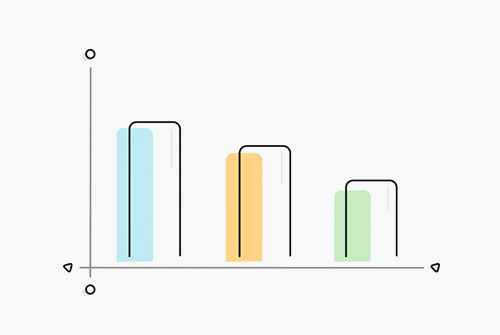

## Boxplot

In [90]:
# df_grap = df.loc[:, 'age':'y']
# df_grap = df_grap.select_dtypes(['int64', 'float64'])

# # Loop through columns and create individual box plots
# for col in df_grap.columns:
#     plt.figure(figsize=(8, 5))
#     sns.boxplot(x=df_grap[col])
#     plt.title("Box Plot of " + col)
#     plt.show()

### Histogram 

In [91]:
# #using for loop for 1 to n no. columns
# #histplot
# df_grap=df.loc[:, 'age':'y']
# df_grap=df_grap.select_dtypes(['int64', 'float64'])
# for i, col in enumerate (df_grap.columns):   #show position of index by enumerate
#     plt.figure(i)
#     sns.histplot(df,x=col,kde=True).set_title("Plot Distribution of "+col)

## Barplot

In [92]:
# #using for loop for 1 to n no. columns
# #Barplot
# df_grap=df.loc[:, 'age':'nr.employed']
# df_grap=df_grap.select_dtypes(['int64', 'float64'])
# for i, col in enumerate (df_grap.columns):   #show position of index by enumerate
#     plt.figure(i)
#     sns.barplot(df,x='y',y=col,palette='rocket',width=0.3).set_title("Deposit VS "+col)

## Countplot

In [93]:
#using for loop for print the columns of histplot
# #count vs column

# selected_columns = ['education','loan','job','nr.employed']
# for column in selected_columns:
#     plt.figure(figsize=(10, 6)) 
#     sns.countplot(df,x=column,palette='Set1',width=0.5) 
#     plt.title("PLot Distributions of " + column)
#     plt.show()

## Comparison

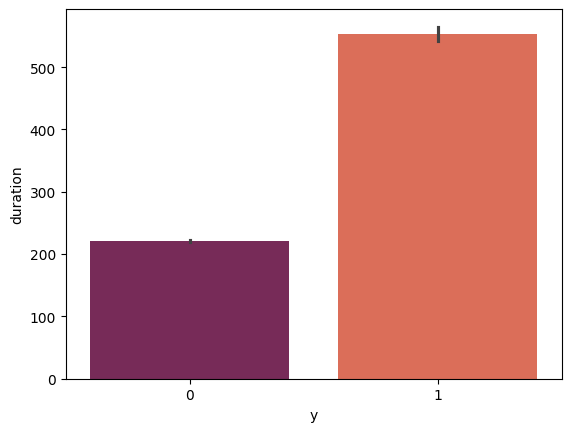

In [24]:
sns.barplot(df,x='y',y='duration',palette="rocket")
plt.show()

                      University degree students are more likely to have loans as compare to others

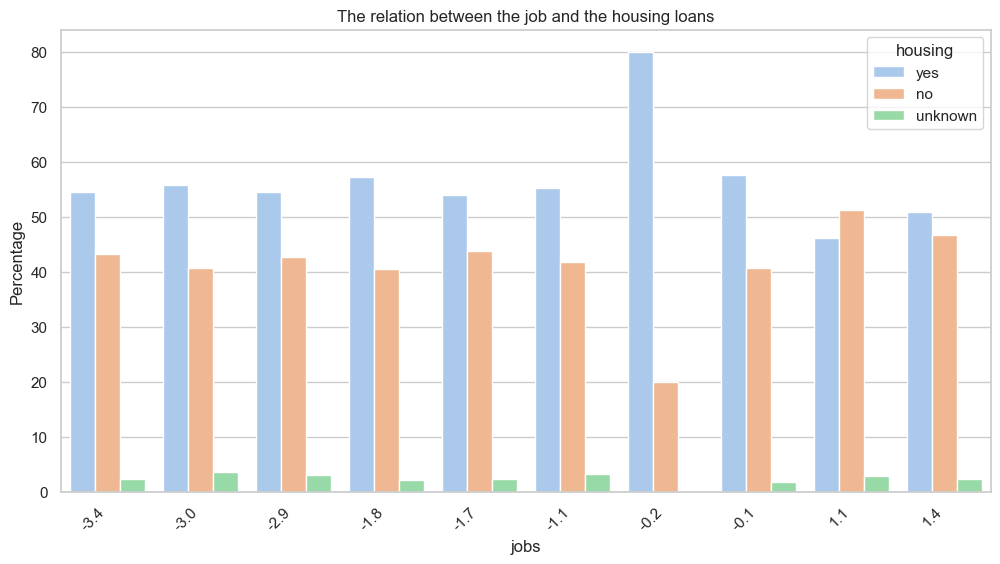

In [323]:
plt.figure(figsize=(12,6))

# Calculate the percentages
percentages = df.groupby('emp.var.rate')['housing'].value_counts(normalize=True).mul(100).rename('percent').reset_index()

# Plot the data
ax=sns.barplot(x='emp.var.rate', y='percent', hue='housing', data=percentages)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.title("The relation between the job and the housing loans")
plt.xlabel("jobs")
plt.ylabel("Percentage")

plt.show()

       Students have a lower probability, while technical and business jobs have higher probability ṭo take personal loan.

<IPython.core.display.Javascript object>


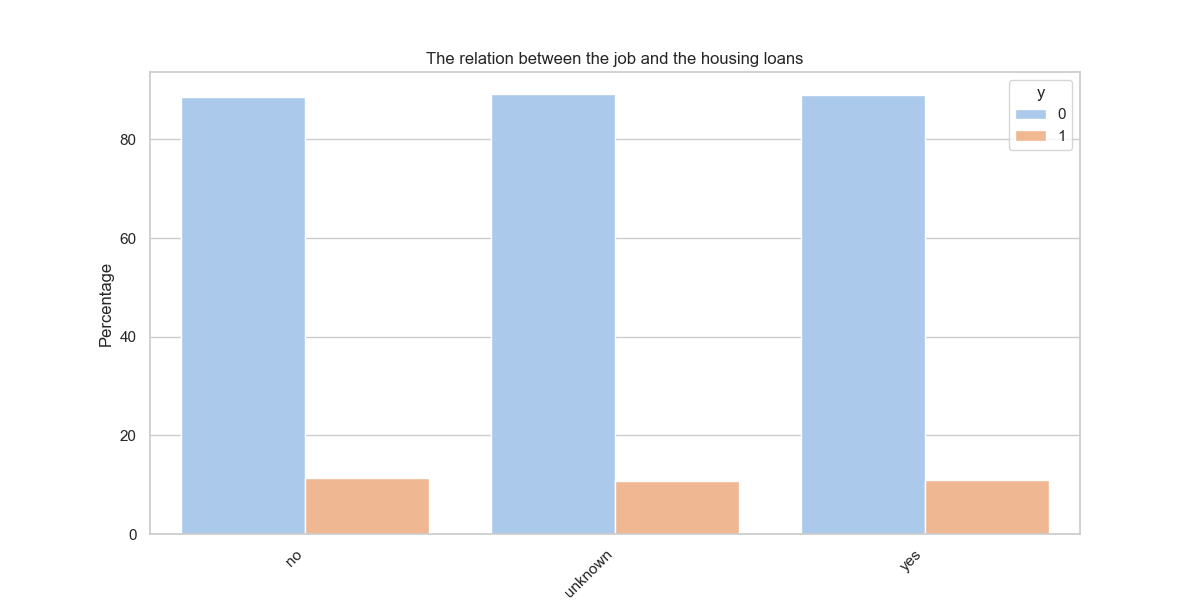

In [370]:
#realtion betweeen job and housing loan
plt.figure(figsize=(12,6))

# Calculate the percentages
percentages = df.groupby('loan')['y'].value_counts(normalize=True).mul(100).rename('percent').reset_index()

# Plot the data
ax=sns.barplot(x='loan', y='percent', hue='y', data=percentages)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.title("The relation between the job and the housing loans")
plt.xlabel("jobs")
plt.ylabel("Percentage")

plt.show()

    Unemployed persons have high probability of taking house loans whereas blue collar jobs person have less probabilty of                                                          taking house loans.

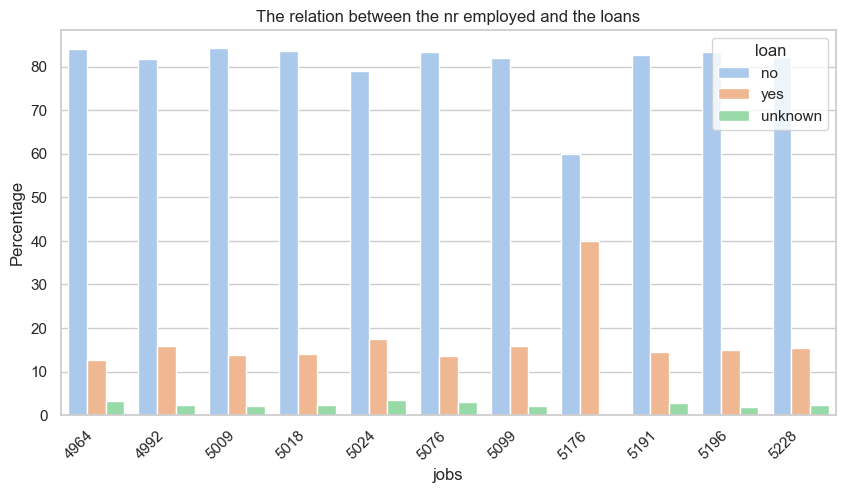

In [242]:
#realtion between employment rate and loans
plt.figure(figsize=(10,5))

# Calculate the percentages
percentages = df.groupby('nr.employed')['loan'].value_counts(normalize=True).mul(100).rename('percent').reset_index()

# Plot the data
ax=sns.barplot(x='nr.employed', y='percent', hue='loan', data=percentages)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.title("The relation between the nr employed and the loans")
plt.xlabel("jobs")
plt.ylabel("Percentage")

plt.show()


               Students are much more likely to subscribe to a term deposit than any other field.

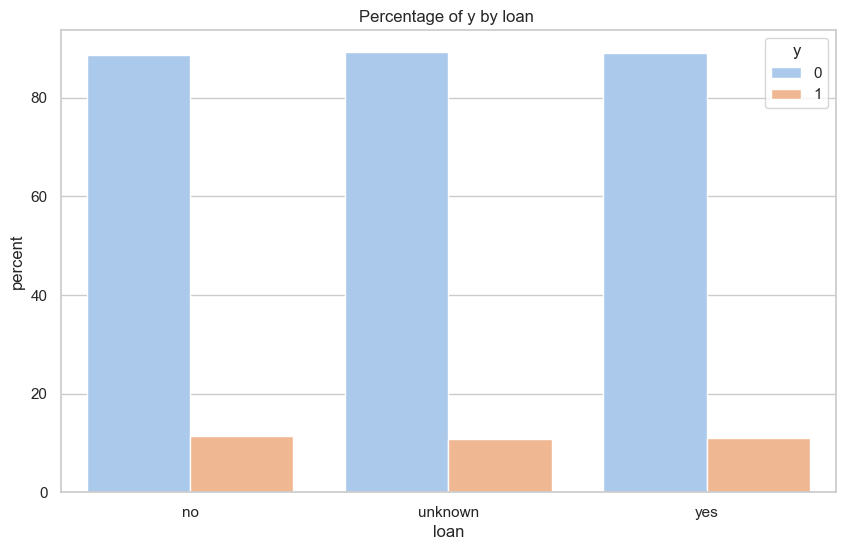

In [243]:
#realtion between loan and term deposit
colors = ['#FFB90F', '#33FFA8']
grouped = df.groupby('loan')['y'].value_counts(normalize=True).mul(100).rename('percent').reset_index()
# Create a bar chart
plt.figure(figsize=(10,6))
ax = sns.barplot(x='loan', y='percent', hue='y', data=grouped)
ax.set_xticklabels(ax.get_xticklabels())
plt.title('Percentage of y by loan ')
plt.show()

In [244]:
#realtion between job and term deposit
# colors = ['#FFB90F', '#33FFA8']
# grouped = df.groupby('job')['y'].value_counts(normalize=True).mul(100).rename('percent').reset_index()
# # Create a bar chart
# plt.figure(figsize=(10,6))
# ax = sns.barplot(x='job', y='percent', hue='y', data=grouped)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
# plt.title('Percentage of y by Job ')
# plt.show()

                        Customers with no loans are more inclined to use a term deposit

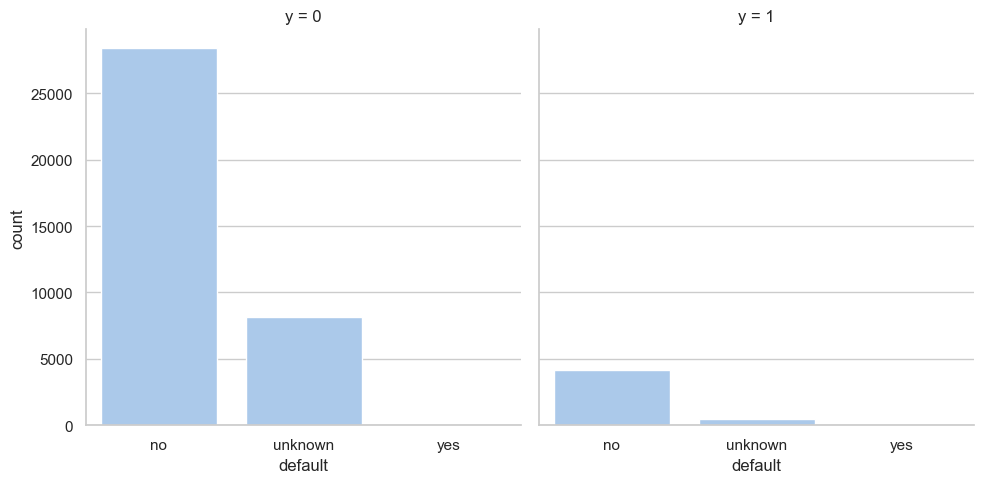

In [245]:
#relation between default and term deposit
sns.catplot(df , x="default" , col="y",kind='count')

                       Coustomer who have credit in default usually are not subscribed to term deposit

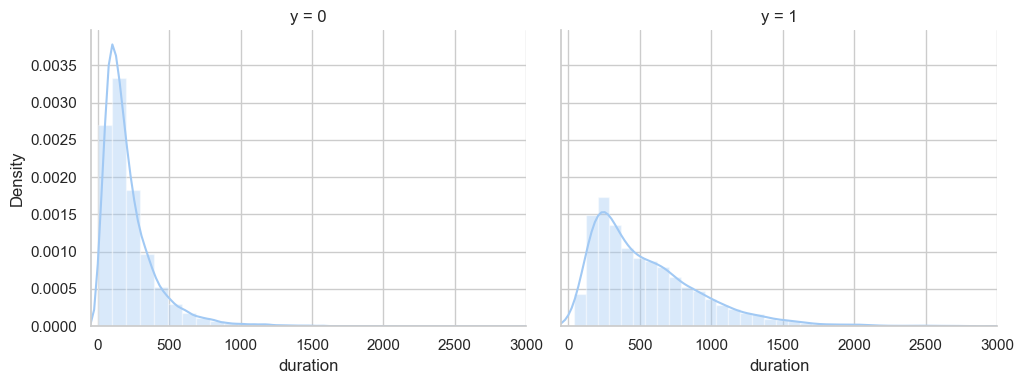

In [246]:
#realtion between term deposit and duration
g=sns.FacetGrid(df,col='y',height=4,aspect=1.3,sharey=True,xlim=(-50,3000))
g.map(sns.distplot,'duration')

            The longer the duration, the more likely it is for the customer to have to a term deposit

In [247]:
#relation between age and term deposit
fig = px.histogram(df,x='age',color='y')
fig.show()

                       (age less than 50-60) have a higher chance to have to a term deposit

In [248]:
numeric_columns = df.select_dtypes(include=[float, int])
correlation_matrix = numeric_columns.corr()
print(correlation_matrix)

                     age  duration     pdays  previous  emp.var.rate  \
age             1.000000 -0.000866 -0.034369  0.024365     -0.000371   
duration       -0.000866  1.000000 -0.047577  0.020640     -0.027968   
pdays          -0.034369 -0.047577  1.000000 -0.587514      0.271004   
previous        0.024365  0.020640 -0.587514  1.000000     -0.420489   
emp.var.rate   -0.000371 -0.027968  0.271004 -0.420489      1.000000   
cons.price.idx  0.000857  0.005312  0.078889 -0.203130      0.775334   
cons.conf.idx   0.129372 -0.008173 -0.091342 -0.050936      0.196041   
nr.employed    -0.017521 -0.044678  0.372314 -0.501122      0.907246   
y               0.030399  0.405274 -0.324914  0.230181     -0.298334   
Unnamed: 21          NaN       NaN       NaN       NaN           NaN   

                cons.price.idx  cons.conf.idx  nr.employed         y  \
age                   0.000857       0.129372    -0.017521  0.030399   
duration              0.005312      -0.008173    -0.044678  0.4

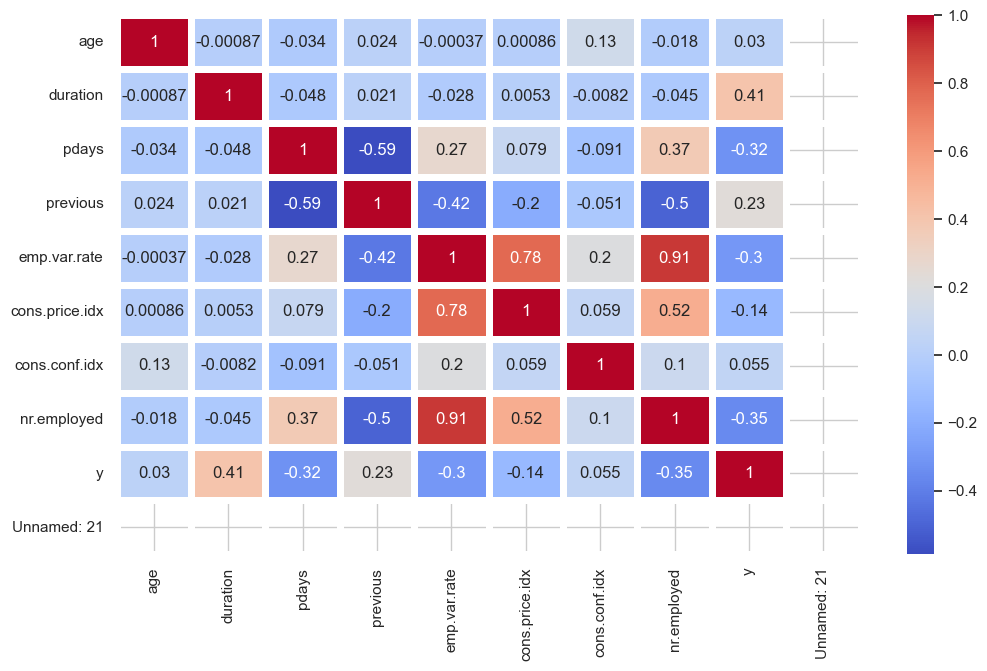

In [249]:
# Exclude non-numeric columns, like 'job'
numeric_columns = df.select_dtypes(include=[float, int])

# Create a correlation matrix
heat = numeric_columns.corr()
plt.figure(figsize=(12, 7))  #figure size x to y

# Create a heatmap of the correlation matrix
sns.heatmap(heat,annot=True,linewidth=5,cmap = 'coolwarm') 
plt.show()

In [250]:
fig = px.line(df, y="loan", color="job", title="Loan vs JOB",color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.update_layout(bargap=1)
fig.show()

### LABEL ENCODING

In [251]:
# label encoding and assign in new variable
from sklearn import preprocessing
label = preprocessing.LabelEncoder()

In [252]:
df.head() 

,age,job,education,default,housing,loan,duration,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,nr.employed,y,Unnamed: 21
0,56,housemaid,basic.4y,no,no,no,261,999,0,nonexistent,1.1,93.994,-36.4,5191,0,NaN
1,57,services,high.school,unknown,no,no,149,999,0,nonexistent,1.1,93.994,-36.4,5191,0,NaN
2,37,services,high.school,no,yes,no,226,999,0,nonexistent,1.1,93.994,-36.4,5191,0,NaN
3,40,admin.,basic.6y,no,no,no,151,999,0,nonexistent,1.1,93.994,-36.4,5191,0,NaN
4,56,services,high.school,no,no,yes,307,999,0,nonexistent,1.1,93.994,-36.4,5191,0,NaN


In [253]:
#assign in new variable
df['eduactionlabel'] = label.fit_transform(df['education'].values)
df['joblabel'] = label.fit_transform(df['job'].values)
df['deafultlabel'] = label.fit_transform(df['default'].values)
df['housinglabel'] = label.fit_transform(df['housing'].values)
df['loanlabel'] = label.fit_transform(df['loan'].values)
df['poutcomelabel'] = label.fit_transform(df['poutcome'].values)

In [254]:
lb=df.groupby('job')
lb=lb['joblabel']
lb.first()

job
admin.            0
blue-collar       1
entrepreneur      2
housemaid         3
management        4
retired           5
self-employed     6
services          7
student           8
technician        9
unemployed       10
unknown          11
Name: joblabel, dtype: int32

In [255]:
df.head()

,age,job,education,default,housing,loan,duration,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,nr.employed,y,Unnamed: 21,eduactionlabel,joblabel,deafultlabel,housinglabel,loanlabel,poutcomelabel
0,56,housemaid,basic.4y,no,no,no,261,999,0,nonexistent,1.1,93.994,-36.4,5191,0,NaN,0,3,0,0,0,1
1,57,services,high.school,unknown,no,no,149,999,0,nonexistent,1.1,93.994,-36.4,5191,0,NaN,3,7,1,0,0,1
2,37,services,high.school,no,yes,no,226,999,0,nonexistent,1.1,93.994,-36.4,5191,0,NaN,3,7,0,2,0,1
3,40,admin.,basic.6y,no,no,no,151,999,0,nonexistent,1.1,93.994,-36.4,5191,0,NaN,1,0,0,0,0,1
4,56,services,high.school,no,no,yes,307,999,0,nonexistent,1.1,93.994,-36.4,5191,0,NaN,3,7,0,0,2,1


## Feature selection

In [256]:
#show Features
df.columns

Index(['age', 'job', 'education', 'default', 'housing', 'loan', 'duration',
       'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'nr.employed', 'y', 'Unnamed: 21', 'eduactionlabel',
       'joblabel', 'deafultlabel', 'housinglabel', 'loanlabel',
       'poutcomelabel'],
      dtype='object')

In [257]:
pickle.dump(df, open("filter_d.pkl","wb"))

In [258]:
#feature selection
f_sel = ['age','duration','pdays', 'previous','emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'nr.employed', 'eduactionlabel', 'joblabel',
       'deafultlabel', 'housinglabel', 'loanlabel','poutcomelabel']

In [259]:
#assign feature & target variable
x=df[f_sel]
y=df['y']

In [260]:
# show the number of rows and columns of X & y
x.shape, y.shape

((41188, 14), (41188,))

In [261]:
#print feature (column) variable
print(x)

       age  duration  pdays  previous  emp.var.rate  cons.price.idx  \
0       56       261    999         0           1.1          93.994   
1       57       149    999         0           1.1          93.994   
2       37       226    999         0           1.1          93.994   
3       40       151    999         0           1.1          93.994   
4       56       307    999         0           1.1          93.994   
...    ...       ...    ...       ...           ...             ...   
41183   73       334    999         0          -1.1          94.767   
41184   46       383    999         0          -1.1          94.767   
41185   56       189    999         0          -1.1          94.767   
41186   44       442    999         0          -1.1          94.767   
41187   74       239    999         1          -1.1          94.767   

       cons.conf.idx  nr.employed  eduactionlabel  joblabel  deafultlabel  \
0              -36.4         5191               0         3           

In [262]:
# print target variable
print(y) 

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41188, dtype: int64


## Data Scaling

In [263]:
# Standard scalar , 
from sklearn.preprocessing import StandardScaler
scaler_data = StandardScaler()
fitx_data = scaler_data.fit_transform(x)  #calculate the mean and sd and apply it

In [264]:
#printed scaled data
print (fitx_data,y)

[[ 1.53303429  0.01047142  0.1954139  ... -1.08770698 -0.45249062
   0.19262207]
 [ 1.62899323 -0.42150051  0.1954139  ... -1.08770698 -0.45249062
   0.19262207]
 [-0.29018564 -0.12451981  0.1954139  ...  0.94212743 -0.45249062
   0.19262207]
 ...
 [ 1.53303429 -0.26722482  0.1954139  ...  0.94212743 -0.45249062
   0.19262207]
 [ 0.38152696  0.70856893  0.1954139  ... -1.08770698 -0.45249062
   0.19262207]
 [ 3.26029527 -0.07438021  0.1954139  ...  0.94212743 -0.45249062
  -2.56309793]] 0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41188, dtype: int64


## Data Splitting

In [265]:
# Importing libraries and data splitting into test and train
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

In [266]:
x_train, x_test, y_train, y_test = train_test_split(fitx_data, y, test_size=0.25, stratify=y) 

In [267]:
#check the shape of x_train & x_test
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((30891, 14), (10297, 14), (30891,), (10297,))

# Model implementation

## 1. Random forest classifier

In [268]:
from sklearn.ensemble import RandomForestClassifier
r_forset = RandomForestClassifier(random_state=42,max_depth=9)
# Training the Random Forest Classifier
r_forset.fit(x_train, y_train)

RandomForestClassifier(max_depth=9, random_state=42)

In [ ]:
# Accuracy score on the training data
x_train_prediction = r_forset.predict(x_train)
training_data_accuracy = accuracy_score(y_train, x_train_prediction)

#format specifier (%.2f)
print('Accuracy score of the training data: %.2f'%training_data_accuracy)


# Accuracy score on the test data
x_test_prediction = r_forset.predict(x_test)
test_data_accuracy = accuracy_score(y_test,x_test_prediction)
print('Accuracy score of the test data: %.2f'%test_data_accuracy)

score=cross_val_score(r_forset,x,y,cv=10)
print('Cross_val_score :',np.mean(score))

Accuracy score of the training data: 0.93
Accuracy score of the test data: 0.91


In [ ]:
print('\n Classification Report \n', classification_report(y_test,x_test_prediction))
print(confusion_matrix(y_test, x_test_prediction))
sns.heatmap(confusion_matrix(y_test, x_test_prediction), annot=True, cmap='Blues', fmt='g')

#AUC Score
print("\n AUC Score", roc_auc_score(y_test,x_test_prediction))

## 2. Logistic regression

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logis_reg = LogisticRegression(random_state=42)

# Training the Logistic Regression
logis_reg.fit(x_train, y_train)   #x_train training data, y_train training target value

In [ ]:
# Accuracy score on the training data
x_train_prediction = logis_reg.predict(x_train)
training_data_accuracy = accuracy_score(y_train,x_train_prediction)
print('Accuracy score of training data is: %.2f'%training_data_accuracy)

# Accuracy score on the test dat|a
x_test_prediction = logis_reg.predict(x_test)
test_data_accuracy = accuracy_score(y_test,x_test_prediction, )
print('Accuracy score of the test data: %.2f'%test_data_accuracy)

#cross validation score
score=cross_val_score(logis_reg,x,y,cv=5)
print('Cross_val_score :',np.mean(score))

In [ ]:
#classification report Awo the test_data or test_target_value
print('\n Classification Report \n', classification_report(y_test,x_test_prediction))
print(confusion_matrix(y_test, x_test_prediction))
sns.heatmap(confusion_matrix(y_test, x_test_prediction), annot=True, cmap='Greys', fmt='g')

print("\n AUC Score", roc_auc_score(y_test,x_test_prediction))

## 3. K-NN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN_clls = KNeighborsClassifier(n_neighbors=3)

#Train the knn for the data
KNN_clls.fit(x_train, y_train)

In [ ]:
# Accuracy score on the training data
x_train_prediction = KNN_clls.predict(x_train)
training_data_accuracy = accuracy_score(y_train,x_train_prediction)
print('Accuracy score of training data is: %.2f'%training_data_accuracy)


# Accuracy score on the test data
x_test_prediction = KNN_clls.predict(x_test)
test_data_accuracy = accuracy_score(y_test,x_test_prediction)
print('Accuracy score of the test data: %.2f'%test_data_accuracy)

#cross validation score
score=cross_val_score(KNN_clls,x,y,cv=10)
print('Cross_val_score :',np.mean(score))

In [ ]:
#classification report Awo the test_data or test_target_value
print('\n Classification Report \n', classification_report(x_test_prediction, y_test))
cm=confusion_matrix(y_test,x_test_prediction)
print(cm)

print("\n AUC Score", roc_auc_score(y_test, x_test_prediction))

## 4. Supoport vector Machine (svm)

In [ ]:
from sklearn.svm import SVC
svm =SVC(kernel='linear', random_state=9)  

#Train the SVM model
svm.fit(x_train, y_train)  

In [ ]:
# Accuracy score on the training data
x_train_prediction = svm.predict(x_train)
training_data_accuracy = accuracy_score(y_train, x_train_prediction)
print('Accuracy score of training data is: %.2f'%training_data_accuracy)

# Accuracy score on the test data
x_test_prediction = svm.predict(x_test)
test_data_accuracy = accuracy_score(y_test,x_test_prediction)
print('Accuracy score of the test data: %.2f'%test_data_accuracy)

#cross validation score
score=cross_val_score(svm,x,y,cv=5)
print('Cross_val_score :',np.mean(score))

In [ ]:
#classification report two the test_data or test_target_value
print('\n Classification Report \n', classification_report(y_test,x_test_prediction))
print(confusion_matrix(y_test, x_test_prediction))
sns.heatmap(confusion_matrix(y_test, x_test_prediction), annot=True, cmap='Blues_r', fmt='g')

print("\n AUC Score", roc_auc_score(y_test, x_test_prediction))

### 5. XG boost

In [ ]:
import xgboost as xgb
xgb= xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# Training the Xgboost
xgb.fit(x_train, y_train)

In [ ]:
# Accuracy score on the training data
xgb_x_train_prediction = xgb.predict(x_train)
xgb_training_data_accuracy = accuracy_score(y_train,xgb_x_train_prediction)
#format specifier (%.2f)
print('Accuracy score of the training data: %.2f'%xgb_training_data_accuracy)


# Accuracy score on the test data
xgb_x_test_prediction = xgb.predict(x_test)
xgb_testing_data_accuracy = accuracy_score(y_test,xgb_x_test_prediction)
print('Accuracy score of the test data: %.2f'%xgb_testing_data_accuracy)


#cross validation score
score=cross_val_score(xgb,x,y,cv=10)
print('Cross_val_score :',np.mean(score))

In [ ]:
#classification report two the test_data or test_target_value
print('\n Classification Report \n', classification_report(y_test,xgb_x_test_prediction))
print(confusion_matrix(y_test, xgb_x_test_prediction))
print("\n AUC Score", roc_auc_score(y_test, xgb_x_test_prediction))

### 6. Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dcs_tree=DecisionTreeClassifier(random_state=42,max_depth=9)

# Train the model
dcs_tree.fit(x_train, y_train)

In [ ]:
# Accuracy score on the training data
dcs_x_train_prediction = dcs_tree.predict(x_train)
dcs_training_data_accuracy = accuracy_score(y_train,dcs_x_train_prediction)
#format specifier (%.2f)
print('Accuracy score of the training data: %.2f'%dcs_training_data_accuracy)


# Accuracy score on the testing data
dcs_x_test_prediction = dcs_tree.predict(x_test)
dcs_testing_data_accuracy = accuracy_score(y_test,dcs_x_test_prediction)
print('Accuracy score of the testing data: %.2f'%dcs_testing_data_accuracy)


#cross validation score
score=cross_val_score(dcs_tree,x,y,cv=10)
print('Cross_val_score :',np.mean(score))

In [ ]:
#classification report two the test_data or test_target_value
print('\n Classification Report \n', classification_report(y_test,dcs_x_test_prediction))
print(confusion_matrix(y_test, dcs_x_test_prediction))
print("\n AUC Score", roc_auc_score(y_test, dcs_x_test_prediction))

## Term Deposit prediciton

### by LogisticRegression
Accuracy score of training data is: 0.91,
Accuracy score of the test data: 0.91,
Cross_val_score : 0.8532548747129342

In [ ]:
#age,duration, pdays, previous, nemp.var.rate, cons.price.idx, cons.conf.idx, nr.employed ,eduactionlabel, joblabel, deafultlabel, housinglabel, loanlabel,poutcomelabel
new_data = [
[55, 553, 3, 4, -2.9, 92.963, -40.8, 5076, 0, 5, 0, 0, 0, 2]]
# Reshape and standardize the input data
new_data_reshaped = np.asarray(new_data)
# standardize the input data

scl_data = scaler_data.transform(new_data_reshaped)
print(scl_data)

# Make predictions for each data point
predictions = logis_reg.predict(scl_data)
print(predictions)

# # Display the predictions
# for i, prediction in enumerate(predictions):
#     if prediction == 0:
#         print(f'Data point {i+1}: Term Deposit No')
#     else:
#         print(f'Data point {i+1}: Term Deposit Yes')

In [ ]:
#age,duration, pdays, previous, nemp.var.rate, cons.price.idx, cons.conf.idx, nr.employed ,eduactionlabel, joblabel, deafultlabel, housinglabel, loanlabel,poutcomelabel

pred_data =(45,198,999,0,1.1,93.994,-36.4,5191,2,7,1,0,0,1)


#data to numpy array
np_arry= np.asarray(pred_data)

# reshape the array for predicting one value
data_reshaped = np_arry.reshape(1,-1)

# standardize the input data
scl_data = scaler_data.transform(data_reshaped)
print(scl_data)

prediction = logis_reg.predict(scl_data)
print(prediction)

if (prediction[0] == 0):
  print('Term Deposit No')
else:
  print('Term Deposit yes')